In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
import os
os.getcwd()


'C:\\Users\\User\\Titanic_Project'

In [7]:
import pandas as pd

train_data = pd.read_csv("titanic/train.csv")
test_data = pd.read_csv("titanic/test.csv")

train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#check for missing data (shows how many missing values there are in each column 0)
train_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


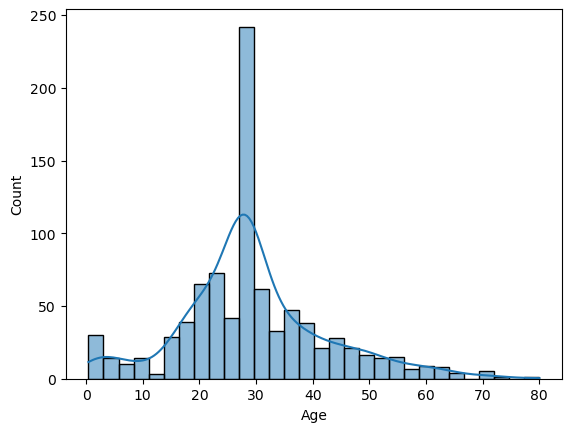

In [15]:
# Visualize distribution of age
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(train_data['Age'], bins=30, kde=True)
plt.show()

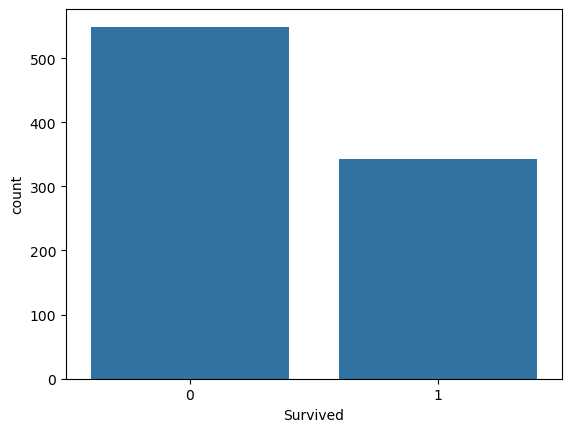

In [17]:
# Check survival count
sns.countplot(x='Survived', data=train_data)
plt.show()

In [21]:
print(train_data.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [23]:
#clean the data 
# Fill missing Age with median
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

# Fill missing Embarked with mode
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)



C:\Users\User\AppData\Local\Temp\ipykernel_22496\3551203301.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_22496\3551203301.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [27]:
#feature engineering
# Convert 'Sex' to numeric
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' to numeric
train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Select features for the model
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_data[features]
y = train_data['Survived']

In [33]:
 #Select Features

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_data[features]
y = train_data['Survived']
X_test = test_data[features]

In [ ]:
#Logistic Regression because it’s for binary classification problems (Survived = 0 or 1).

In [59]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [61]:
#Test Split (for evaluation)
# ======================
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
print("Train missing values:\n", train_data[features].isnull().sum())
print("Test missing values:\n", test_data[features].isnull().sum())


Train missing values:
 Pclass        0
Sex         891
Age           0
SibSp         0
Parch         0
Fare          0
Embarked    891
dtype: int64
Test missing values:
 Pclass        0
Sex         418
Age           0
SibSp         0
Parch         0
Fare          1
Embarked    418
dtype: int64


In [45]:
# Reload fresh data (to avoid keeping broken columns)
train_data = pd.read_csv("titanic/train.csv")
test_data = pd.read_csv("titanic/test.csv")

In [51]:
# Fill missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_22496\3023547026.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_22496\3023547026.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [53]:
# Encode categorical variables safely
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [55]:
#Double-check after encoding we should find 0
print("Train missing values:\n", train_data[['Sex','Embarked']].isnull().sum())
print("Test missing values:\n", test_data[['Sex','Embarked']].isnull().sum())


Train missing values:
 Sex         0
Embarked    0
dtype: int64
Test missing values:
 Sex         0
Embarked    0
dtype: int64


In [57]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_data[features]
y = train_data['Survived']
X_test = test_data[features]


In [63]:
# Train Logistic Regression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [65]:
# Evaluate on validation set
y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))

Validation Accuracy: 0.7988826815642458


In [67]:
#Predict on test data
# Predict on the test set
test_predictions = model.predict(X_test)

In [69]:
# Create submission DataFrame
submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": test_predictions
})

In [71]:
# Save as CSV file
submission.to_csv("submission.csv", index=False)

print("✅ Submission file saved as submission.csv")

✅ Submission file saved as submission.csv
